In [1]:
import pandas as pd

exac = pd.read_csv('/Users/brendan/Github/moalmanac/moalmanac/datasources/exac/exac.expanded.min.r1.txt',
                  sep='\t', low_memory=False)

In [2]:
idx_snps = (exac['REF'].str.len() == 1) & (exac['ALT'].str.len() == 1)
exac_snps = exac[idx_snps]

In [3]:
noty_af_thresh = 0.01   # 10^-2
y_af_thresh = 0.00001   # 10^-5

idx_noty = (exac_snps['CHROM'] != 'Y') & (exac_snps['AF'] > noty_af_thresh)
idx_y = (exac_snps['CHROM'] == 'Y') & (exac_snps['AF'] > y_af_thresh)
idx_keep = idx_noty[idx_noty].index.union(idx_y[idx_y].index)

exac_hets = exac_snps.loc[idx_keep, :]

In [4]:
exac_hets['start'] = exac_hets['POS'] - 1
exac_hets['end'] = exac_hets['POS']

In [5]:
exac_hets_export = exac_hets.loc[:, ['CHROM', 'start', 'end']]
exac_hets_export.to_csv('exac_hets.bed', sep='\t', index=False, header=False)

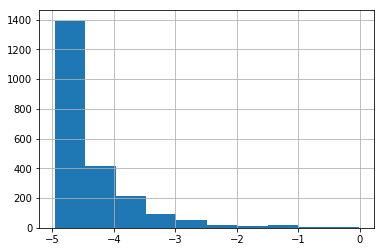

In [6]:
import numpy as np
%matplotlib inline
exac_hets.loc[idx_y, 'AF'].apply(np.log10).hist()